# Amount of Restaurants by Neighborhood  

## By: Gavin Fehl

##### Datasets: [Allegheny County Assets](https://data.wprdc.org/dataset/allegheny-county-assets )

## CSV Manipulation Machine
The Following cell collects the massive dataset from "alleghenyassetmap.csv" and compacts it down into "assets.csv" which for all assets now holds only the asset's name, neighborhood in which it resides, and the tyoe of asset that it is. The neighborhood was not within the data so it had to be determined for each. *It takes a long time to run as the dataset is large*, we later found a faster better was to do this for the asbestos dataset, but this is what I started with, I put it in a csv so that the net step could be done repeatedly without having to run this behemoth every time.

In [2]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 
  
  
# default dict to determine type
def def_value(): 
    return 'string'
# initialize coords from csv
d = defaultdict(def_value) 
d["latitude"] = 'float'
d["longitude"] = 'float'
d["asset_type"] = 'str'
d["_id"] = 'int'
d["name"] = 'str'

# places and assets
places = pd.read_csv("alleghenyassetmap.csv", usecols=['_id', 'name', 'asset_type', 'latitude', 'longitude'], index_col="_id", dtype=d)
assets = pd.DataFrame(columns=('name', 'asset_type', 'neighborhood',))


#for every lat and long determine neighborhood and add the information to a csv
for index, row in places.iterrows():
    # Latitude & Longitude input
    Latitude = row['latitude']
    Longitude = row['longitude']

    location = fpsnippets.geo_to_neighborhood(Latitude, Longitude)
    
    if location != None :
        # data in this row
        new_row = pd.Series(
            {"name": row['name'],
             "asset_type": row['asset_type'],
             "neighborhood": location})
        #append row's data to assets
        assets = pd.concat([assets, new_row.to_frame().T], ignore_index=True)
        
#assets ro csv: relevantplaces.csv
assets.to_csv('assets.csv', sep=',', index=False, encoding='utf-8')
        

## More CSV Magic and a Graph also, Yay!

The following code block takes the simplified data from "assets.csv" and counts how many of a desired asset (restauraunts in this case) each neighborhood has, it puts this data in "neighborhood_counts.csv" as well as graphs it visually. The csv certainly need not to be made, but it certainly helped in troubleshooting, so made it was.

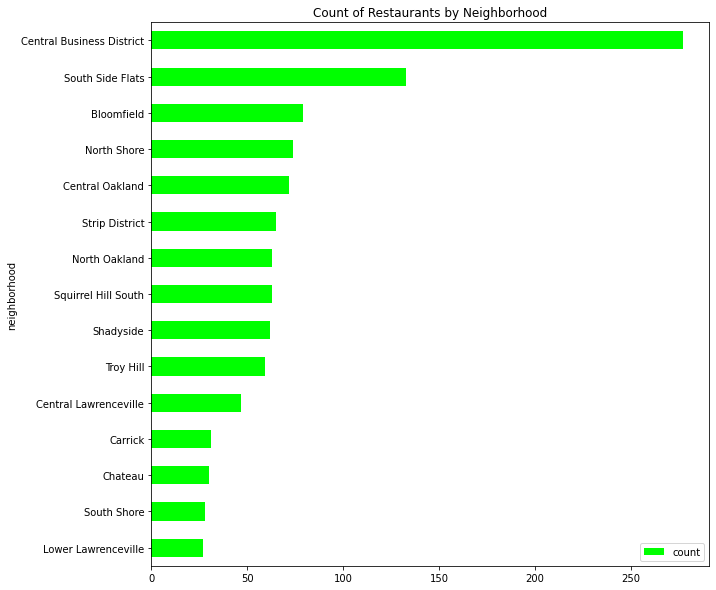

In [2]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 

# places and relevant places
assets = pd.read_csv("assets.csv", usecols=['name', 'asset_type', 'neighborhood'], dtype=str)
desired_asset = 'restaurants'

all_desired_assets = assets[assets['asset_type'] == desired_asset]

# Group by 'neighborhood' and count the number of the desired assets in each neighborhood
neighborhood_counts = all_desired_assets.groupby('neighborhood').size().reset_index(name='restaurant_count')
neighborhood_counts.columns = ['neighborhood', 'count']
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=True)


# Save the result to a new CSV file
neighborhood_counts.to_csv('neighborhood_counts.csv', index=False)
ax = neighborhood_counts.tail(15).plot.barh(color="lime", x='neighborhood', y='count', figsize=(10, 10,), title='Count of '+desired_asset.capitalize()+' by Neighborhood')

## Analysis
Our rat families love to eat, and thus I plotted the top 15 places for restaurants in Pittsburgh! This doesn't necessarily account for the size of the neighborhood, but being a large neighborhood comes with pros and cons... One pro is more room for restaurants... and rats. The rats will feast on the bountiful leftovers from locations like the Central Business District, South Side Flats, and Bloomfield. As far as restaurant quantity the neighborhoods at the top of this graph take the cake! Central Business District had a whopping 277, so thats the best place for them to snack on leftovers...

or seek employment:
![employment](https://media.giphy.com/media/wNDa1OZtvl6Fi/giphy.gif)